In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet
from sktime.datatypes import check_raise

In [20]:
#create a pandas dataframe with the data from the .csv file and define headings
df = pd.read_csv((r'C:\Users\devik\OneDrive\Documents\CIS6035\uk_greenhouse_gases.csv'), parse_dates=[0], index_col=False, names=['Year','Geothermal'])

#drop first row
df.drop(index=df.index[0], axis=0, inplace=True)

#visualise data
display(df)

,Year,Geothermal
1,1990,806.3
2,1991,814.6
3,1992,793
4,1993,773.1
5,1994,761.8
6,1995,755.4
7,1996,775.2
8,1997,750.5
9,1998,748.3
10,1999,718.5


In [21]:
print(df.to_string())

    Year Geothermal
1   1990      806.3
2   1991      814.6
3   1992        793
4   1993      773.1
5   1994      761.8
6   1995      755.4
7   1996      775.2
8   1997      750.5
9   1998      748.3
10  1999      718.5
11  2000      718.2
12  2001      720.8
13  2002      698.5
14  2003      704.9
15  2004      700.6
16  2005      692.3
17  2006      684.6
18  2007      672.1
19  2008      650.5
20  2009      594.3
21  2010      608.6
22  2011      562.8
23  2012      579.3
24  2013      565.6
25  2014      525.2
26  2015      507.9
27  2016      483.1
28  2017      471.6
29  2018      463.5
30  2019      447.9
31  2020      405.5


In [22]:
#create a new column to store the year column as a datetime
df["years"]=pd.to_datetime(df["Year"])

display(df)

,Year,Geothermal,years
1,1990,806.3,1990-01-01
2,1991,814.6,1991-01-01
3,1992,793,1992-01-01
4,1993,773.1,1993-01-01
5,1994,761.8,1994-01-01
6,1995,755.4,1995-01-01
7,1996,775.2,1996-01-01
8,1997,750.5,1997-01-01
9,1998,748.3,1998-01-01
10,1999,718.5,1999-01-01


In [23]:
#set the new years column as the index of the df
df.set_index("years",inplace=True)

display(df)

,Year,Geothermal
years,,
1990-01-01,1990,806.3
1991-01-01,1991,814.6
1992-01-01,1992,793
1993-01-01,1993,773.1
1994-01-01,1994,761.8
1995-01-01,1995,755.4
1996-01-01,1996,775.2
1997-01-01,1997,750.5
1998-01-01,1998,748.3


In [24]:
#set the frequency of the index as AS for annual
df.index.freq='AS'

In [25]:
#convert the geothermal column to a float
df['Geothermal'] = pd.to_numeric(df['Geothermal'])

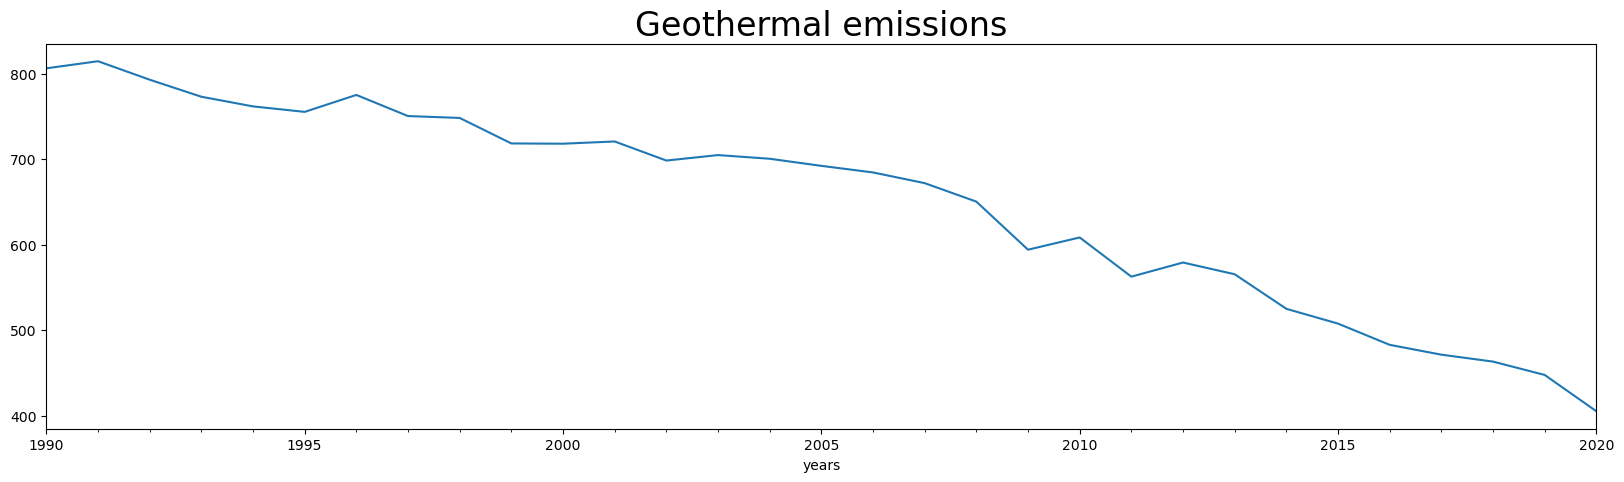

In [26]:
#plot df
df['Geothermal'].plot(figsize=(20,5))
plt.title("Geothermal emissions", size=24)

plt.show()

In [27]:
print(df.dtypes)

Year           object
Geothermal    float64
dtype: object


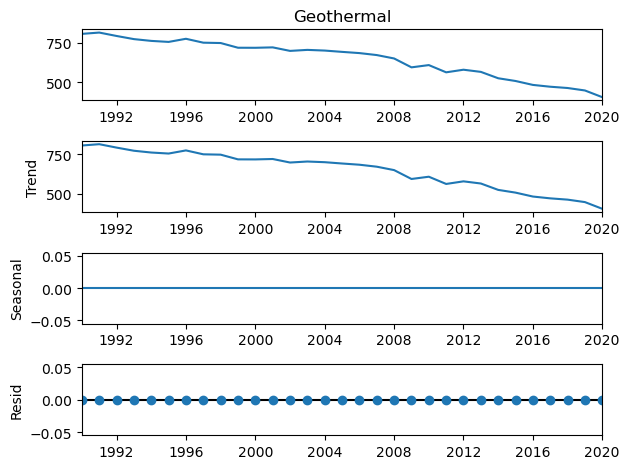

In [28]:
#use the seasonal decompose module to create graphs on df
result = seasonal_decompose(df['Geothermal'], model="add")

result.plot();

In [29]:
#use ARIMA to get summary on df data
auto_arima(df['Geothermal'],seasonal=True,m=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -127.287
Date:                Mon, 17 Apr 2023   AIC                            260.574
Time:                        14:20:26   BIC                            264.778
Sample:                    01-01-1990   HQIC                           261.919
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -18.1254      4.416     -4.104      0.000     -26.781      -9.470
ar.L1         -0.3637      0.225     -1.616      0.106      -0.805       0.077
sigma2       282.2465     72.677      3.884      0.000     139.802     424.691
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.87   Prob(JB):                         0.32
Heteroskedasticity (H):               1.43   Skew:                            -0.61
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='years'>

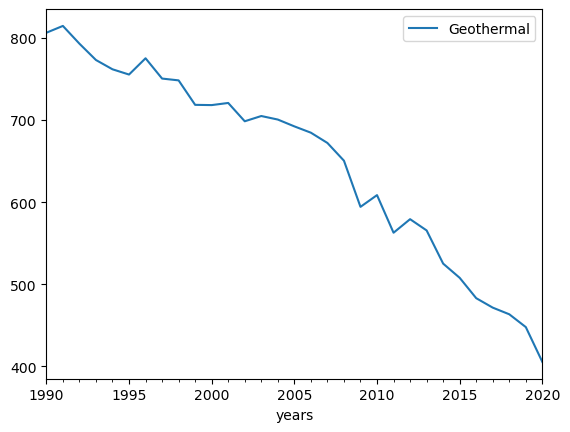

In [30]:
df.plot()

In [31]:
df.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='years', freq='AS-JAN')

In [32]:
#define forecast_df
forecast_df = df.resample(rule="AS").sum()

In [33]:
#create a method to handle training the dataset and making predictions

#df is dataset arg, horizon is prediction period i.e. 30 years, forecaster built-in, validation defaults to false, 
#confidence defaults to 0.9, frequency is measure of data period where AS is annual
def sktime_forecast(df, horizon, forecaster, validation=False, confidence=0.9, frequency="AS"):
    
    #adjust frequency
    forecast_df = df.resample(rule="AS").sum()

    #interpolate missing periods
    forecast_df = forecast_df.interpolate(method="time")

    for col in df.columns:

        #validate forecaster
        if validation:
            df = forecast_df[col]
            
            #split data into training and testing in an 80/20 split
            y_train, y_test=temporal_train_test_split(forecast_df, train_size=0.8)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = temporal_train_test_split(forecast_df, test_size=0.2)

            mae = mean_absolute_error(y_true, y_pred)

        #make future predictions based on dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str('2020-01-01'), periods=30, freq=frequency),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            y_pred = y_pred * 0.76
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            ci = ci * 0.76
            mae = np.nan

        #plot results
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        plt.title(
             f"{horizon} year forecast for {col} (confidence: {confidence*100}%)"
        )
        plt.ylim(bottom=0)
        plt.grid(False)
        plt.show()

14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


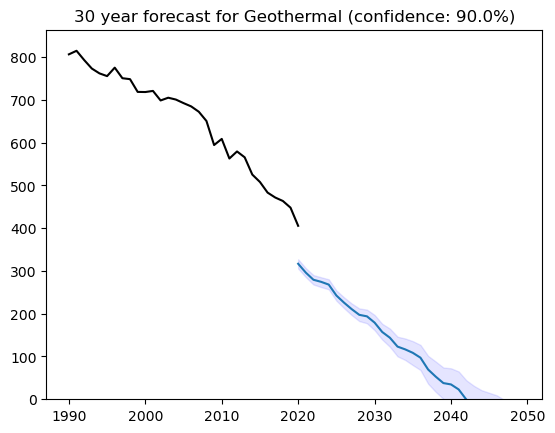

In [34]:
forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
sktime_forecast(df=forecast_df, horizon=30, forecaster=forecaster, validation=False)